# <h1 align = "center">INF3721 : APPRENTISSAGE SUPERVISEE ET NON SUPERVISEE I</h1>
# <h1 align = "center">TP1 PERCEPTRON MULTI-COUCHE: MLP</h1>
<span>Universite de yaounde 1 </span><br>
<span>Departement informatique </span><br>
<span>Licence 3 Data science </span><br>
<table align="center">
  <thead>
    <tr>
      <th>Noms</th>
      <th>Prenoms</th>
      <th>Matricule</th>
    </tr>
  </thead>
  <tbody bgcolor='green' align='center'>
    <tr>
      <td>LONTSI LAMBOU</td>
      <td>RONALDINO</td>
      <td>21T2271</td>
    </tr>
    <tr>
      <td>NDONKOU</td>
      <td>FRANCK</td>
      <td>21T2254</td>
    </tr>
     <tr>
      <td>TCHIAZE FOUOSSO</td>
      <td>ROMERO</td>
      <td>21T2474</td>
    </tr>
     <tr>
      <td>DJAMPA NJUITCHA</td>
      <td>ANICET</td>
      <td>21T2692</td>
    </tr>
  </tbody>
</table>

#### Nous avons ajouté une bibliothèque : from sklearn.metrics import accuracy_score pour calculer la valeur de la précision, afin de l'utiliser pour comparer avec d'autres modèles si l'on ajoute ou diminue le nombre de couches cachées ou de neurones dans les couches cachées, ou si l'on change la fonction d'activation.

#### **Observations :**

#### Le modèle a une précision de 97,83%.

#### Nous remarquons que lorsque nous changeons la fonction d'activation en sigmoid et que nous augmentons le nombre de neurones de la couche cachée à 200, la précision augmente à 97,98%.

#### Quand nous augmentons le nombre de neurones de la couche cachée à 200 et que nous laissons la fonction d'activation à ReLU, la précision passe à 98,02%.

#### quand nous augmentons le nombre de neurones de la couche cachée à 200 et que nous changeons la fonction d'activation en tangente hyperbolique, la précision passe à 98,14%.

#### Quand nous laissons le nombre de neurones de la couche cachée à 128 et que nous changeons la fonction d'activation en tangente hyperbolique, la précision passe à 98,13%.

# <h3 align = "center">Importation des bibliotheques</h3>

In [139]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
 

# <h3 align = "center">Réglage des paramètres graphiques</h3>

In [140]:

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

# <h3 align = "center">Fixer la graine pour rendre l'entraînement déterministe.</h3>

In [141]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)


# <h3 align = "center">chargement des dommees </h3>

In [142]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

# <h3 align = "center">separaction des dommees en donnee d'entrainement validation et texte.</h3>

In [143]:

 
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
 
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]
 
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


# <h3 align = "center">visualisation de quelques dommees </h3>

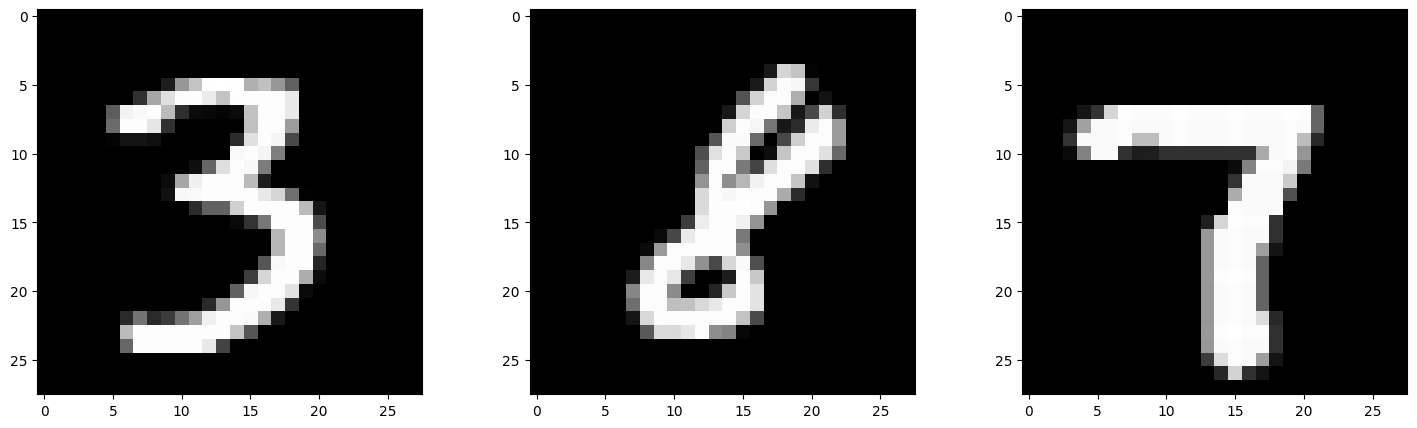

In [144]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

# <h3 align = "center">Mise en forme des données pour le modèle MLP </h3>

In [145]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255
 
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255
 
X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [146]:
# Load the Fashion MNIST dataset.
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()
 
# The labels in the Fashion MNIST dataset are encoded as integers.
print(y_train_fashion[0:9])

[9 0 0 3 0 2 7 2 5]


#<h3 align="center">Conversion des étiquettes en one-hot encoding</h3>

In [147]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


<h3 align="center">Conversion des étiquettes en one-hot encoding pour les ensembles d'entraînement, de validation et de test</h3>

In [148]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

In [149]:
# Instantiate the model.
model = tf.keras.Sequential()
 
# Build the model.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax"))
 
# Display the model summary.
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# <h3 align="center">compilation du modele</h3>

In [150]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# <h3 align="center">Entraînement du modèle</h3>

In [151]:
training_results = model.fit(X_train, 
                             y_train, 
                             epochs=21, 
                             batch_size=64, 
                             validation_data=(X_valid, y_valid));

Epoch 1/21
782/782 [==============================] - 2s 2ms/step - loss: 0.2833 - accuracy: 0.9173 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 2/21
782/782 [==============================] - 2s 2ms/step - loss: 0.1205 - accuracy: 0.9636 - val_loss: 0.1248 - val_accuracy: 0.9635
Epoch 3/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0836 - accuracy: 0.9733 - val_loss: 0.1233 - val_accuracy: 0.9634
Epoch 4/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0997 - val_accuracy: 0.9721
Epoch 5/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0984 - val_accuracy: 0.9747
Epoch 6/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0951 - val_accuracy: 0.9734
Epoch 7/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0931 - val_accuracy: 0.9756
Epoch 

782/782 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.1361 - val_accuracy: 0.9709
Epoch 10/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.1068 - val_accuracy: 0.9772
Epoch 11/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.1087 - val_accuracy: 0.9787
Epoch 12/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.1200 - val_accuracy: 0.9764
Epoch 13/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.1327 - val_accuracy: 0.9752
Epoch 14/21
782/782 [==============================] - 2s 2ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.1419 - val_accuracy: 0.9750
Epoch 15/21
782/782 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1190 - val_accuracy: 0.9789
Epoch 16/21

# <h3 align="center">fonction pour afficher les résultats d'entraînement </h3>

In [152]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

# <h3 align="center">resultat de l'entrainement </h3>

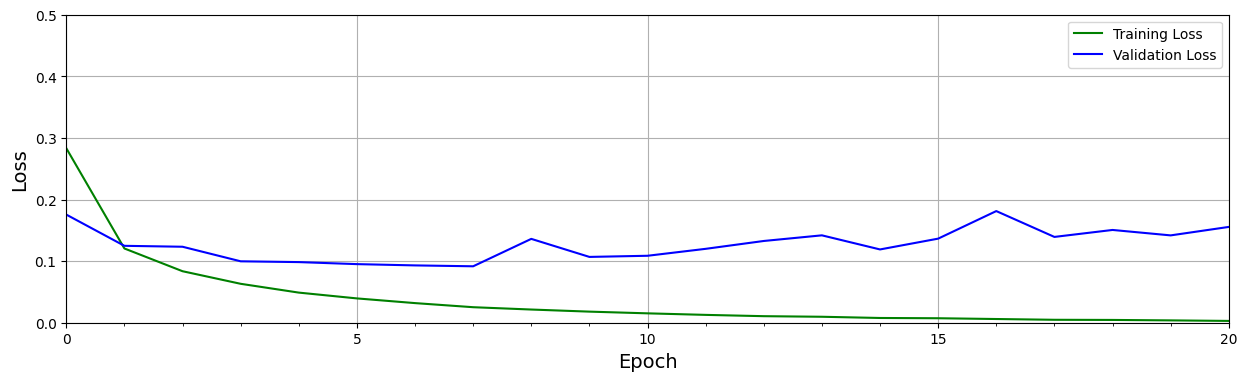

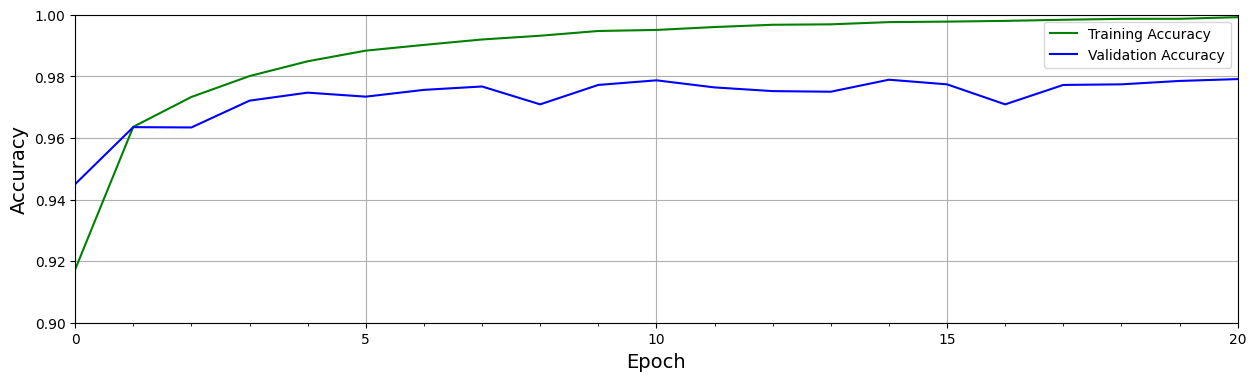

In [153]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]
 
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# <h3 align="center">Génération des prédictions pour l'ensemble de test</h3>

In [154]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 [==============================] - 0s 1ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  1.9580766e-23
digit: 1  probability:  1.2307654e-18
digit: 2  probability:  3.22585e-14
digit: 3  probability:  2.129002e-15
digit: 4  probability:  1.3740606e-26
digit: 5  probability:  1.6644172e-24
digit: 6  probability:  2.3901957e-32
digit: 7  probability:  1.0
digit: 8  probability:  1.3682085e-25
digit: 9  probability:  5.6819127e-18


# <h3 align="center">Pour chaque image de l'ensemble de test, sélectionnez l'étiquette de classe avec la probabilité la plus élevée.</h3>

In [155]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)
 
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 0s 986us/step


# <h3 align="center">  Conversion des étiquettes one-hot encoding en entiers.</h3>

In [156]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# <h3 align="center"> Calcul de la précision du modèle</h3>

In [157]:
accuracy = accuracy_score(y_test_integer_labels, predicted_labels)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 97.83%


# <h3 align="center"> Affichage de la matrice de confusion sous forme de heatmap.</h3>

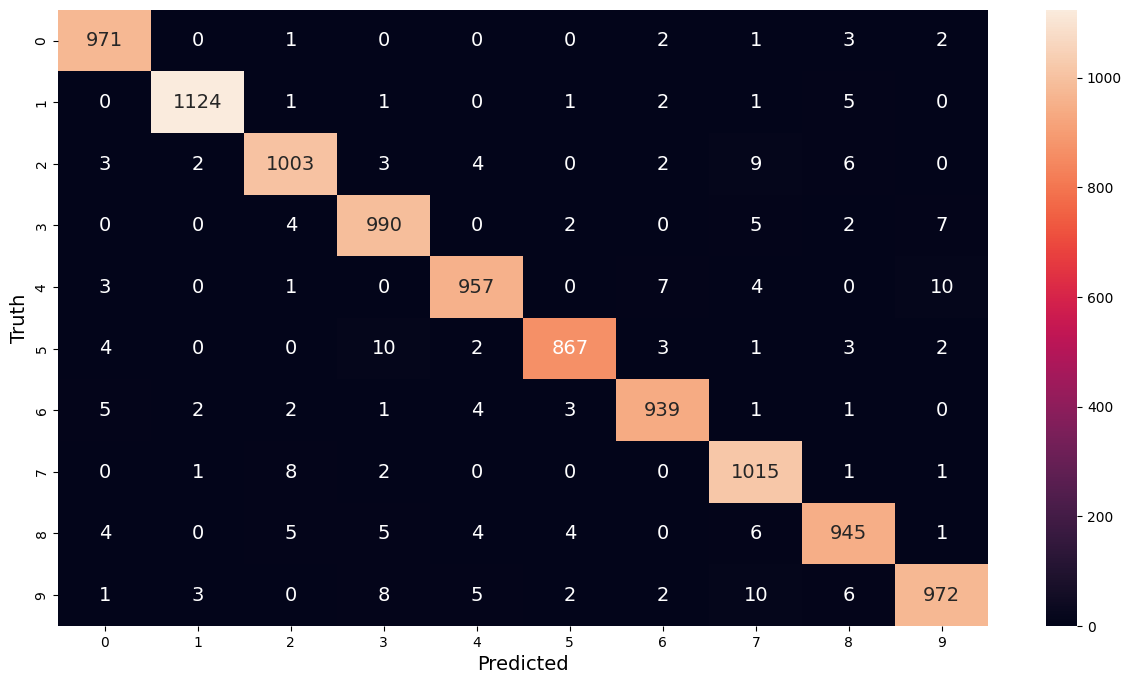

In [158]:

 
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)
 
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## **conclusion**

#### Après évaluation de notre modèle, nous pouvons considérer ce modèle comme étant bon, mais il pourrait être encore meilleur en modifiant les hyperparamètres. 
